In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from nets import *
from cfgs import *
from data import *
from trainer import *
from payment_utils import get_payment



In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

# v1, v2を[0, 1]の範囲で生成
x = np.linspace(0, 1.0, D)

# v3を複数の値でサンプリング（3次元可視化のため）
v3_values = np.linspace(0, 1.0, 5)  # v3を0, 0.25, 0.5, 0.75, 1.0の5つの値でサンプリング
print(f'v3_values: {v3_values}')

cfg = additive_1x3_uniform_0_1_config.cfg
cfg.test.batch_size = D
cfg.test.save_output = True


v3_values: [0.   0.25 0.5  0.75 1.  ]


In [3]:
Net = additive_net.Net
Generator = uniform_01_generator.Generator
Trainer = trainer.Trainer


In [4]:
# 各v3値に対してテストデータを生成し、推論を実行
net = Net(cfg, "test")
m = Trainer(cfg, "test", net)

# 各v3値での結果を保存
alloc_dict = {}
pay_dict = {}

for v3_val in v3_values:
    # 3財のテストデータを生成: [v1, v2, v3]
    X_tst = np.stack([v.flatten() for v in np.meshgrid(x, x)], axis=-1)
    # v3を固定値で追加
    X_tst = np.concatenate([X_tst, np.full((X_tst.shape[0], 1), v3_val)], axis=-1)
    
    cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
    
    generator = Generator(cfg, 'test', X_tst)
    m.test(generator)
    
    # 結果を読み込んで保存
    alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D, D, 3)
    pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D, D)
    
    alloc_dict[v3_val] = alloc
    pay_dict[v3_val] = pay
    
    print(f"Completed v3 = {v3_val:.2f}")


2025-11-13 08:00:46,858:INFO:TEST ALL-200000: t = 0.2299, Net_Loss: -0.476056, Revenue: 0.476056


Completed v3 = 0.00


2025-11-13 08:00:47,083:INFO:TEST ALL-200000: t = 0.2206, Net_Loss: -0.667065, Revenue: 0.667065


Completed v3 = 0.25


2025-11-13 08:00:47,320:INFO:TEST ALL-200000: t = 0.2330, Net_Loss: -0.904785, Revenue: 0.904785


Completed v3 = 0.50


2025-11-13 08:00:47,634:INFO:TEST ALL-200000: t = 0.3074, Net_Loss: -1.130782, Revenue: 1.130782


Completed v3 = 0.75


2025-11-13 08:00:47,945:INFO:TEST ALL-200000: t = 0.3055, Net_Loss: -1.137945, Revenue: 1.137945


Completed v3 = 1.00


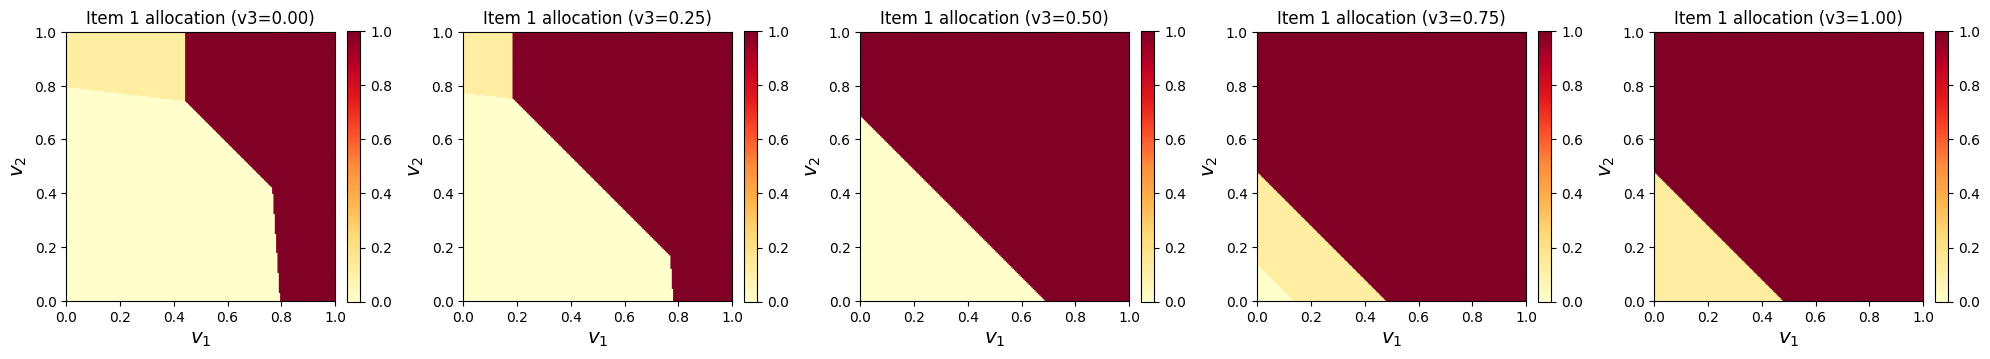

In [5]:
# 各v3値でのアイテム1の配分確率を可視化
fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    alloc = alloc_dict[v3_val]
    ax = axes[idx]
    
    img = ax.imshow(alloc[::-1, :, 0], extent=[0, 1, 0, 1], vmin=0.0, vmax=1.0, cmap='YlOrRd')
    ax.set_xlabel(r'$v_1$')
    ax.set_ylabel(r'$v_2$')
    ax.set_title(f'Item 1 allocation (v3={v3_val:.2f})')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1_v3_grid.pdf'), bbox_inches='tight', pad_inches=0.05)
plt.show()


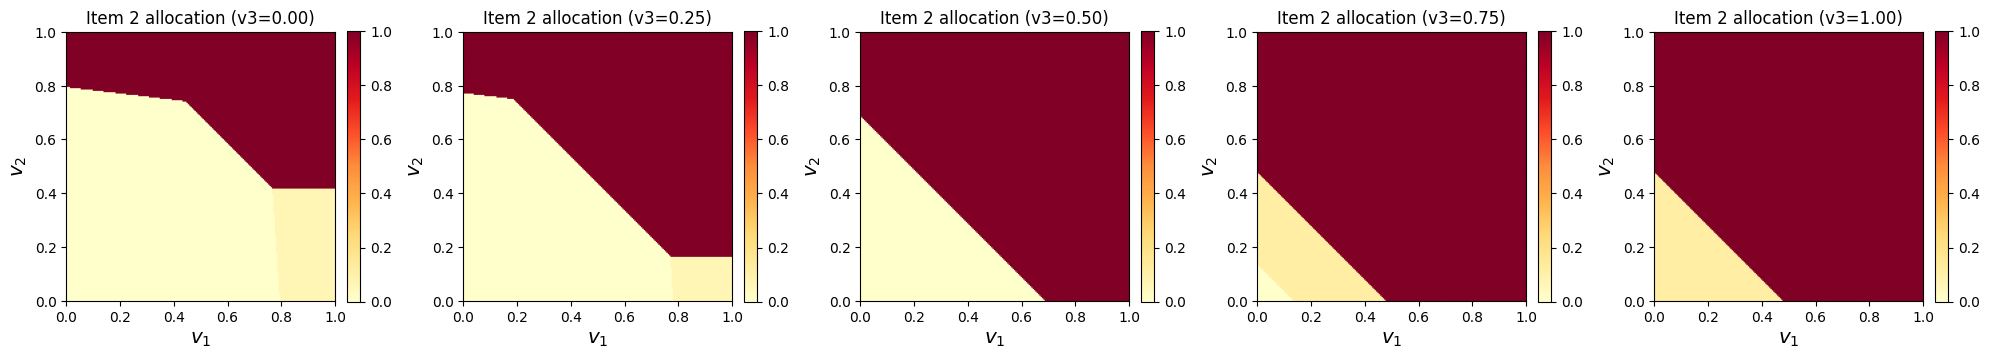

In [6]:
# 各v3値でのアイテム2の配分確率を可視化
fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    alloc = alloc_dict[v3_val]
    ax = axes[idx]
    
    img = ax.imshow(alloc[::-1, :, 1], extent=[0, 1, 0, 1], vmin=0.0, vmax=1.0, cmap='YlOrRd')
    ax.set_xlabel(r'$v_1$')
    ax.set_ylabel(r'$v_2$')
    ax.set_title(f'Item 2 allocation (v3={v3_val:.2f})')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2_v3_grid.pdf'), bbox_inches='tight', pad_inches=0.05)
plt.show()


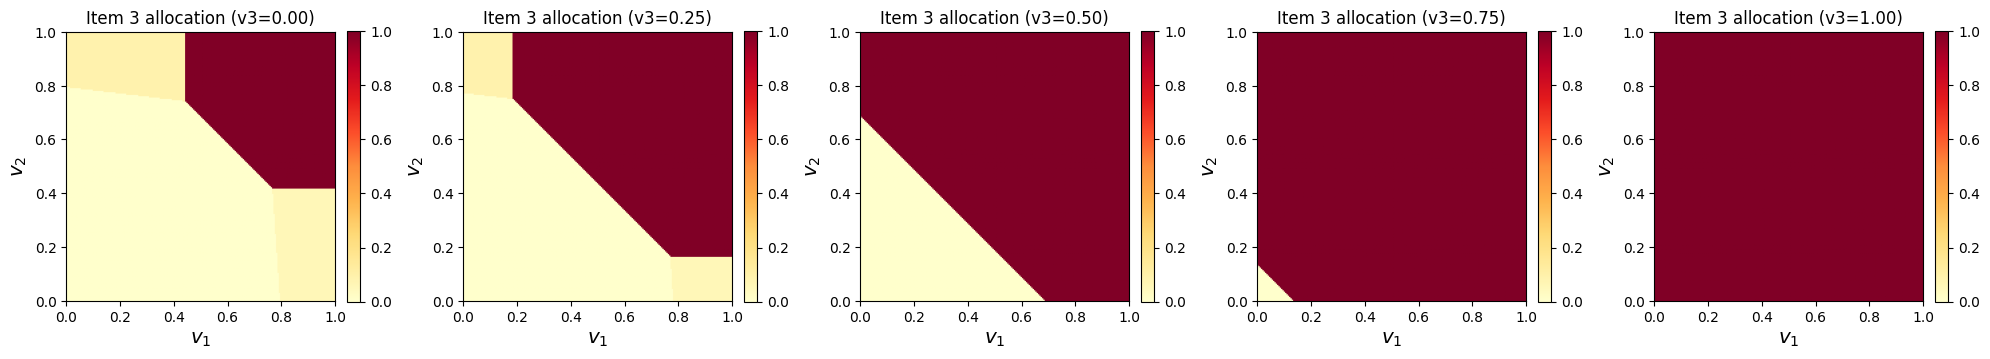

In [7]:
# 各v3値でのアイテム3の配分確率を可視化
fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    alloc = alloc_dict[v3_val]
    ax = axes[idx]
    
    img = ax.imshow(alloc[::-1, :, 2], extent=[0, 1, 0, 1], vmin=0.0, vmax=1.0, cmap='YlOrRd')
    ax.set_xlabel(r'$v_1$')
    ax.set_ylabel(r'$v_2$')
    ax.set_title(f'Item 3 allocation (v3={v3_val:.2f})')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'alloc3_v3_grid.pdf'), bbox_inches='tight', pad_inches=0.05)
plt.show()


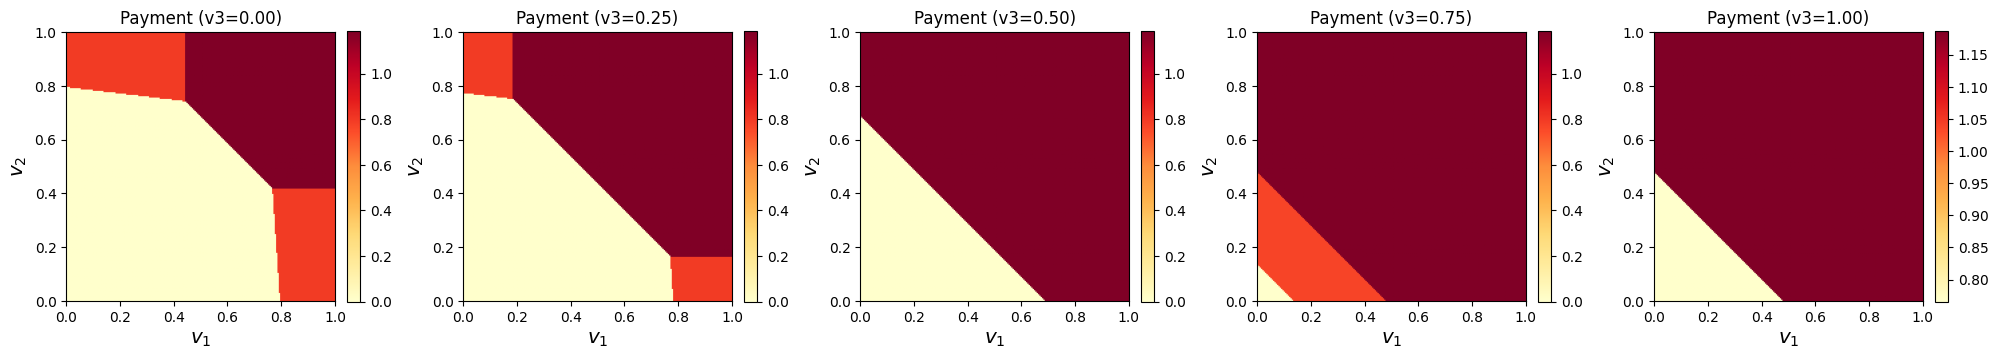

In [8]:
# インタラクティブなプロット（plotly使用）- マウスホバーで座標と値を表示
x_max = x[-1]  # Cell 1で定義されたxの最大値を使用
# データを準備
pay_display = pay  # データは反転しない
    x_coords = np.linspace(0, x_max, D)
    y_coords = np.linspace(0, x_max, D)
        
        # plotlyのヒートマップを作成
    fig = go.Figure(data=go.Heatmap(
    z=pay_display,
    x=x_coords,
    y=y_coords,
    colorscale='YlOrRd',
    colorbar=dict(title="Payment"),
    hovertemplate='v₁=%{x:.3f}<br>v₂=%{y:.3f}<br>Payment=%{z:.6f}<extra></extra>',
    name=''
    ))
        
    fig.update_layout(
    title='Payment (Interactive - Hover to see values)',
    xaxis_title='v₁',
    yaxis_title='v₂',
    width=800,
    height=600
    )
        
        # HTMLファイルとして保存して表示（最も確実な方法）
    html_file = os.path.join(cfg.dir_name, 'pay_interactive.html')
    fig.write_html(html_file)
    print(f"インタラクティブなプロットを保存しました: {html_file}")
    print("ブラウザで開くと、マウスホバーで座標と値を表示できます。")
        
        # Jupyter Notebook内で表示を試みる
    try:
    from IPython.display import HTML, IFrame
    display(HTML(f'<iframe src="{{html_file}}" width="850" height="650"></iframe>'))
    except:
        try:
        from IPython.display import display, HTML
        display(HTML(f'<a href="{{html_file}}" target="_blank">インタラクティブなプロットを開く</a>'))
        except:
        pass
        
    if save_plot:
        try:
        fig.write_image(os.path.join(cfg.dir_name, 'pay.pdf'))
        except:
        pass  # write_imageが使えない場合はスキップ
    print(f"plotlyの表示でエラーが発生しました: {e}")
    print("matplotlibのプロットにフォールバックします。")


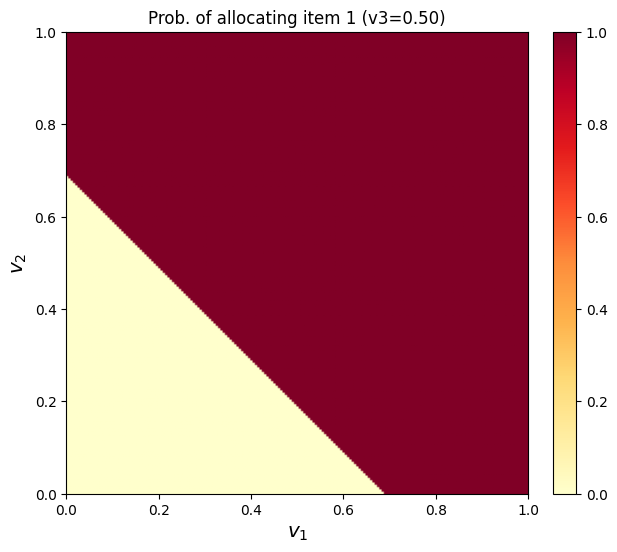

In [9]:
# v3=0.5の場合の詳細可視化（代表例）
v3_representative = 0.5
alloc = alloc_dict[v3_representative]
pay = pay_dict[v3_representative]

# アイテム1の配分確率
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 6))

img = ax.imshow(alloc[::-1, :, 0], extent=[0, 1, 0, 1], vmin=0.0, vmax=1.0, cmap='YlOrRd')
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title(f'Prob. of allocating item 1 (v3={v3_representative:.2f})')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1_v3_0.5.pdf'), bbox_inches='tight', pad_inches=0.05)
plt.show()


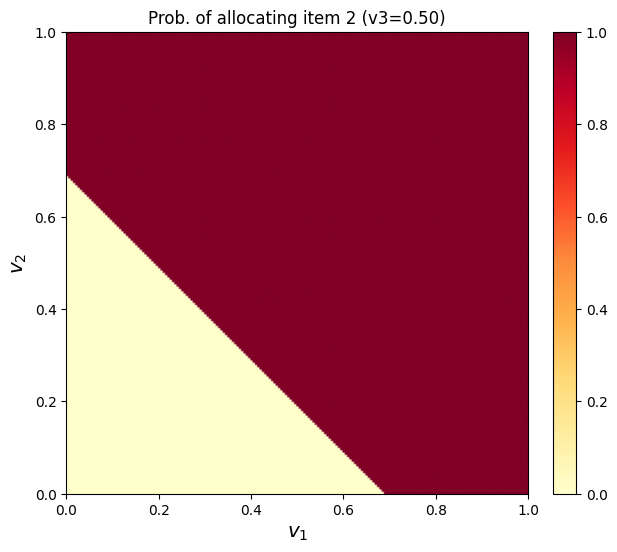

In [10]:
# アイテム2の配分確率
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 6))

img = ax.imshow(alloc[::-1, :, 1], extent=[0, 1, 0, 1], vmin=0.0, vmax=1.0, cmap='YlOrRd')
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title(f'Prob. of allocating item 2 (v3={v3_representative:.2f})')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2_v3_0.5.pdf'), bbox_inches='tight', pad_inches=0.05)
plt.show()


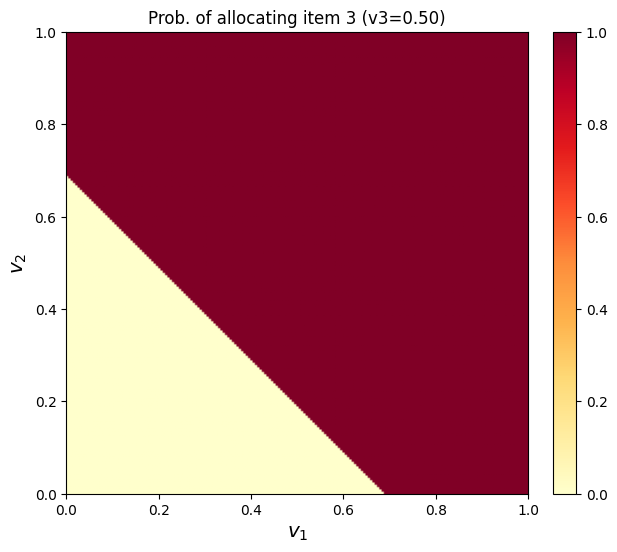

In [11]:
# アイテム3の配分確率
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 6))

img = ax.imshow(alloc[::-1, :, 2], extent=[0, 1, 0, 1], vmin=0.0, vmax=1.0, cmap='YlOrRd')
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title(f'Prob. of allocating item 3 (v3={v3_representative:.2f})')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc3_v3_0.5.pdf'), bbox_inches='tight', pad_inches=0.05)
plt.show()


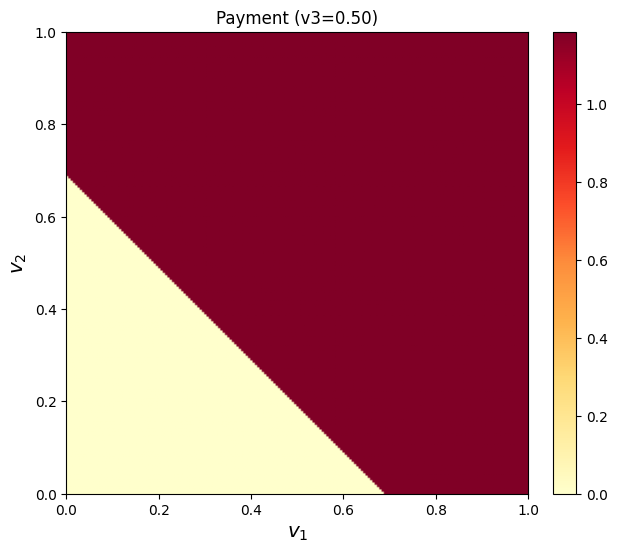

In [ ]:
# 支払いの可視化（インタラクティブなプロット）
x_max = x[-1]  # Cell 1で定義されたxの最大値を使用
# データを準備
pay_display = pay  # データは反転しない
    x_coords = np.linspace(0, x_max, D)
    y_coords = np.linspace(0, x_max, D)
        
        # plotlyのヒートマップを作成
    fig = go.Figure(data=go.Heatmap(
    z=pay_display,
    x=x_coords,
    y=y_coords,
    colorscale='YlOrRd',
    colorbar=dict(title="Payment"),
    hovertemplate='v₁=%{x:.3f}<br>v₂=%{y:.3f}<br>Payment=%{z:.6f}<extra></extra>',
    name=''
    ))
        
    fig.update_layout(
    title=f'Payment (Interactive - v3={v3_representative:.2f})',
    xaxis_title='v₁',
    yaxis_title='v₂',
    width=800,
    height=600
    )
        
        # HTMLファイルとして保存して表示
    html_file = os.path.join(cfg.dir_name, f'pay_interactive_v3_{v3_representative:.2f}.html')
    fig.write_html(html_file)
    print(f"インタラクティブなプロットを保存しました: {html_file}")
    print("ブラウザで開くと、マウスホバーで座標と値を表示できます。")
        
        # Jupyter Notebook内で表示を試みる
    try:
    from IPython.display import HTML, IFrame
    display(HTML(f'<iframe src="{html_file}" width="850" height="650"></iframe>'))
    except:
        try:
        from IPython.display import display, HTML
        display(HTML(f'<a href="{html_file}" target="_blank">インタラクティブなプロットを開く</a>'))
        except:
        pass
        
    if save_plot:
        try:
        fig.write_image(os.path.join(cfg.dir_name, f'pay_v3_{v3_representative:.2f}.pdf'))
        except:
        pass
    print(f"plotlyの表示でエラーが発生しました: {e}")
    print("matplotlibのプロットにフォールバックします。")


In [13]:
# Payment statistics for v3=0.5
print("Payment Statistics (v3=0.5):")
print(f"Min: {np.min(pay):.6f}")
print(f"Max: {np.max(pay):.6f}")
print(f"Mean: {np.mean(pay):.6f}")
print(f"Median: {np.median(pay):.6f}")
print(f"Std: {np.std(pay):.6f}")
print(f"\nPayment at selected points:")
print(f"pay[0, 0] (v1=0, v2=0): {pay[0, 0]:.6f}")
print(f"pay[D//2, D//2] (v1=0.5, v2=0.5): {pay[D//2, D//2]:.6f}")
print(f"pay[-1, -1] (v1=1.0, v2=1.0): {pay[-1, -1]:.6f}")
print(f"pay[D//4, D//4] (v1=0.25, v2=0.25): {pay[D//4, D//4]:.6f}")
print(f"pay[3*D//4, 3*D//4] (v1=0.75, v2=0.75): {pay[3*D//4, 3*D//4]:.6f}")


Payment Statistics (v3=0.5):
Min: 0.000000
Max: 1.186440
Mean: 0.904785
Median: 1.186440
Std: 0.504814

Payment at selected points:
pay[0, 0] (v1=0, v2=0): 0.000000
pay[D//2, D//2] (v1=0.5, v2=0.5): 1.186440
pay[-1, -1] (v1=1.0, v2=1.0): 1.186440
pay[D//4, D//4] (v1=0.25, v2=0.25): 0.000000
pay[3*D//4, 3*D//4] (v1=0.75, v2=0.75): 1.186440
